<h1>Project 2- Regression </h1>

# Group 15
## Aadith Narayan Ravishankar AXR180085
## Mohanram Balaji Senthil Kumar MXS180135


Source: random sample of 1734 houses taken from full Saratoga Housing Data (De Veaux) Number of Cases: 1734 Story: House prices and properties in New York. What properties of a house can predict its price? Can we use such a model to identify houses that are extraordinarily expensive or inexpensive?

Data Description,

<ol>
    <li>price price (1000s of US dollars)</li> 
<li>lotSize size of lot (square feet)</li> 
<li>age age of house (years) </li>
<li>landValue value of land (1000s of US dollars) </li>
<li>livingArea living area (square feet) </li>
<li>pctCollege percent of neighborhood that graduated college </li>
<li>bedrooms number of bedrooms </li>
<li>firplaces number of fireplaces </li>
<li>bathrooms number of bathrooms (half bathrooms have no shower or tub) </li>
<li>rooms number of rooms </li>
<li>heating type of heating system </li>
<li>fuel fuel used for heating</li>
<li>sewer type of sewer system </li>
<li>waterfront whether property includes waterfront </li>
<li>newConstruction whether the property is a new construction </li>
<li>centralAir whether the house has central air</li>
    </ol>

<h2>Pre-Processing of the dataset </h2>

<h3> Exploratory Data Analysis </h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
house=pd.read_csv("house.csv")

In [6]:
house.head()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Test
0,311000,0.46,0,17.0,60500,0,1,Gas,Hot Water,Public,2762,63.0,4,1.0,2.5,8.0,1
1,182000,0.02,0,32.0,22500,0,0,Electric,Electric,Private,1753,35.0,3,0.0,1.5,5.0,1
2,297900,0.30,0,15.0,34000,0,1,Gas,Hot Air,Public,2288,64.0,3,1.0,2.5,8.0,1
3,210000,0.49,0,15.0,25000,0,0,Gas,Hot Air,NaN,1592,54.0,3,1.0,1.5,8.0,0
4,130000,0.16,0,36.0,54900,0,0,Gas,Hot Air,Public,1134,57.0,3,0.0,1.0,4.0,0


In [7]:
df=pd.DataFrame(house)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1734 non-null   int64  
 1   Lot.Size       1734 non-null   float64
 2   Waterfront     1734 non-null   int64  
 3   Age            1713 non-null   float64
 4   Land.Value     1734 non-null   int64  
 5   New.Construct  1734 non-null   int64  
 6   Central.Air    1734 non-null   int64  
 7   Fuel.Type      1734 non-null   object 
 8   Heat.Type      1734 non-null   object 
 9   Sewer.Type     1709 non-null   object 
 10  Living.Area    1734 non-null   int64  
 11  Pct.College    1712 non-null   float64
 12  Bedrooms       1734 non-null   int64  
 13  Fireplaces     1724 non-null   float64
 14  Bathrooms      1734 non-null   float64
 15  Rooms          1720 non-null   float64
 16  Test           1734 non-null   int64  
dtypes: float64(6), int64(8), object(3)
memory usage: 230

In [9]:
df.isnull().sum()

Price             0
Lot.Size          0
Waterfront        0
Age              21
Land.Value        0
New.Construct     0
Central.Air       0
Fuel.Type         0
Heat.Type         0
Sewer.Type       25
Living.Area       0
Pct.College      22
Bedrooms          0
Fireplaces       10
Bathrooms         0
Rooms            14
Test              0
dtype: int64

In [10]:
df.describe()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Test
count,1734.000000,1734.000000,1734.000000,1713.000000,1734.000000,1734.000000,1734.000000,1734.000000,1712.000000,1734.000000,1724.000000,1734.000000,1720.000000,1734.000000
mean,211545.054210,0.500294,0.008651,28.201985,34536.228374,0.046713,0.366205,1752.630911,55.639019,3.151672,0.600348,1.898501,7.031395,0.414648
std,98553.809581,0.698201,0.092632,29.687785,34980.940615,0.211084,0.481905,620.224953,10.309385,0.817830,0.556521,0.658355,2.322250,0.492803
min,5000.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,145000.000000,0.170000,0.000000,13.000000,15100.000000,0.000000,0.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000,0.000000
50%,189700.000000,0.370000,0.000000,19.000000,25000.000000,0.000000,0.000000,1632.000000,57.000000,3.000000,1.000000,2.000000,7.000000,0.000000
75%,257289.500000,0.540000,0.000000,34.000000,40200.000000,0.000000,1.000000,2133.500000,64.000000,4.000000,1.000000,2.500000,8.000000,1.000000
max,775000.000000,12.200000,1.000000,225.000000,412600.000000,1.000000,1.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000,1.000000


In [11]:
df.drop('Test',axis=1,inplace=True)

<h3> Imputing Null values in the dataset </h3>

In [12]:
df['Age']=df[['Age']].transform(lambda x: x.fillna(int(x.median())))

In [13]:
df['Sewer.Type'].unique()

array(['Public', 'Private', nan, 'None/Unknown'], dtype=object)

In [14]:
df['Sewer.Type']=df[['Sewer.Type']].transform(lambda x: x.fillna('None/Unknown'))

In [15]:
df.describe()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1712.000000,1734.000000,1724.000000,1734.000000,1720.000000
mean,211545.054210,0.500294,0.008651,28.090542,34536.228374,0.046713,0.366205,1752.630911,55.639019,3.151672,0.600348,1.898501,7.031395
std,98553.809581,0.698201,0.092632,29.524534,34980.940615,0.211084,0.481905,620.224953,10.309385,0.817830,0.556521,0.658355,2.322250
min,5000.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,0.000000,13.000000,15100.000000,0.000000,0.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189700.000000,0.370000,0.000000,19.000000,25000.000000,0.000000,0.000000,1632.000000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,257289.500000,0.540000,0.000000,34.000000,40200.000000,0.000000,1.000000,2133.500000,64.000000,4.000000,1.000000,2.500000,8.000000
max,775000.000000,12.200000,1.000000,225.000000,412600.000000,1.000000,1.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [16]:
df['Pct.College']=df[['Pct.College']].transform(lambda x: x.fillna(int(x.median())))

In [17]:
df['Fireplaces']=df[['Fireplaces']].transform(lambda x: x.fillna(int(x.median())))

In [18]:
df['Rooms']=df[['Rooms']].transform(lambda x: x.fillna(x.median()))

In [19]:
df.isnull().sum()

Price            0
Lot.Size         0
Waterfront       0
Age              0
Land.Value       0
New.Construct    0
Central.Air      0
Fuel.Type        0
Heat.Type        0
Sewer.Type       0
Living.Area      0
Pct.College      0
Bedrooms         0
Fireplaces       0
Bathrooms        0
Rooms            0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1734 non-null   int64  
 1   Lot.Size       1734 non-null   float64
 2   Waterfront     1734 non-null   int64  
 3   Age            1734 non-null   float64
 4   Land.Value     1734 non-null   int64  
 5   New.Construct  1734 non-null   int64  
 6   Central.Air    1734 non-null   int64  
 7   Fuel.Type      1734 non-null   object 
 8   Heat.Type      1734 non-null   object 
 9   Sewer.Type     1734 non-null   object 
 10  Living.Area    1734 non-null   int64  
 11  Pct.College    1734 non-null   float64
 12  Bedrooms       1734 non-null   int64  
 13  Fireplaces     1734 non-null   float64
 14  Bathrooms      1734 non-null   float64
 15  Rooms          1734 non-null   float64
dtypes: float64(6), int64(7), object(3)
memory usage: 216.9+ KB


In [21]:
df['Fuel.Type'].unique()

array(['Gas', 'Electric', 'Oil', 'Unknown/Other', 'Wood', 'None', 'Solar'],
      dtype=object)

<h3> Using one hot encoding to convert categorical features to numerical features </h3>

In [22]:
cl=pd.get_dummies(df['Fuel.Type'],columns='Fuel.Type',prefix='Fuel')
df[cl.columns]= cl
df.drop(('Fuel.Type'),axis=1, inplace=True)

In [23]:
df['Heat.Type'].unique()

array(['Hot Water', 'Electric', 'Hot Air', 'None'], dtype=object)

In [24]:
    cl=pd.get_dummies(df['Heat.Type'],columns='Heat.Type',prefix='Heat')
    df[cl.columns]= cl
    df.drop(('Heat.Type'),axis=1, inplace=True)

In [25]:
cl=pd.get_dummies(df['Sewer.Type'],columns='Sewer.Type',prefix='Sewer')
df[cl.columns]= cl
df.drop(('Sewer.Type'),axis=1, inplace=True)

In [26]:
df.shape

(1734, 27)

<h3> Splitting the data into train and test sets </h3>

In [27]:
X=df.drop('Price',axis=1)
Y=df['Price']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [29]:
X_train_org,X_test_org,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=0)

In [30]:
scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)
print(X_train.shape)

(1387, 26)


<h3>Bagging Regressor with Decision Tree Regressor </h3>

In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeRegressor(random_state=0)
bag_clf = BaggingRegressor(dt_clf, bootstrap=True, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid.fit(X_train, Y_train)
train=grid.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid.score(X_test,Y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 100}
Train score: 0.7487440603707227
Test score: 0.6606910990744923


<h3>Bagging Regressor with Linear SVR </h3>

In [32]:
from sklearn.svm import SVR,LinearSVR
clf1=LinearSVR()
bag_clf1 = BaggingRegressor(clf1, bootstrap=True, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid1=GridSearchCV(bag_clf1,param_grid,cv=5,return_train_score=True)
grid1.fit(X_train, Y_train)
train=grid1.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid1.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid1.score(X_test,Y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 50}
Train score: -4.41795945354148
Test score: -5.514295947492502


<h3>Pasting with Linear Regression </h3>

In [33]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(copy_X= True, fit_intercept= False, normalize= True)
pas_clf = BaggingRegressor(lr_clf,bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid2=GridSearchCV(pas_clf,param_grid,cv=5,return_train_score=True)
grid2.fit(X_train, Y_train)
train=grid2.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid2.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid2.score(X_test,Y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 50}
Train score: 0.6531192708568357
Test score: 0.6558298304823773


<h3> Pasting with Ridge Regression </h3>

In [34]:
from sklearn.linear_model import Ridge
r_clf = Ridge(alpha= 0.1)
pas_clf1 = BaggingRegressor(r_clf,bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid3=GridSearchCV(pas_clf1,param_grid,cv=5,return_train_score=True)
grid3.fit(X_train, Y_train)
train=grid3.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid3.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid3.score(X_test,Y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 50}
Train score: 0.6508847478954797
Test score: 0.6586860199227791


<h3> Ada Boosting with Decision Tree Regressor </h3>

In [35]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid4=GridSearchCV(ada_clf,param_grid,cv=5,return_train_score=True)
grid4.fit(X_train, Y_train)
train=grid4.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid4.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid4.score(X_test,Y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.24405456901323372
Test score: 0.09041442379441822


<h3> Ada Boosting with Lasso Regression </h3>

In [36]:
from sklearn.linear_model import Lasso
ada_clf1 = AdaBoostRegressor(Lasso(alpha=10), random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid5=GridSearchCV(ada_clf1,param_grid,cv=5,return_train_score=True)
grid5.fit(X_train, Y_train)
train=grid5.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid5.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid5.score(X_test,Y_test)))

Best Parameters: {'learning_rate': 1, 'n_estimators': 50}
Train score: 0.6090201881608291
Test score: 0.6190785936891614


<h3> Gradient Boosting Regressor </h3>

In [37]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid6=GridSearchCV(gbrt,param_grid,cv=5,return_train_score=True)
grid6.fit(X_train, Y_train)
train=grid6.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid6.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid6.score(X_test,Y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.8937514177117686
Test score: 0.5921138788581473


<h3> PCA with KNN Regression </h3>

In [38]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("knn", KNeighborsRegressor())
    ])
param_grid5 = {'knn__n_neighbors': [3,5,7,10,19],'knn__weights': ['uniform','distance'],'knn__metric': ['euclidean','manhattan']}
grid7=GridSearchCV(clf,param_grid5,cv=3,return_train_score=True)
grid7.fit(X_train,Y_train)
train=grid7.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid7.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid7.score(X_test,Y_test)))

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'distance'}
Train score: 0.7901379744999255
Test score: 0.5115595216235551


<h3> PCA with Linear Regression </h3>

In [39]:
clf1 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lr", LinearRegression())
    ])
parameters = {'lr__fit_intercept':[True,False], 'lr__normalize':[True,False], 'lr__copy_X':[True, False]}
grid8=GridSearchCV(clf1,parameters,cv=3,return_train_score=True)
grid8.fit(X_train,Y_train)
train=grid8.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid8.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid8.score(X_test,Y_test)))

Best Parameters: {'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__normalize': False}
Train score: -1.77331920117229
Test score: 0.47853450608838277


<h3> PCA with Ridge Regression </h3>

In [40]:
clf2 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("rid", Ridge())
    ])
parameters1={'rid__alpha':[0.1,1,10,100]}
grid9=GridSearchCV(clf2,parameters1,cv=3,return_train_score=True)
grid9.fit(X_train,Y_train)
train=grid9.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid9.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid9.score(X_test,Y_test)))

Best Parameters: {'rid__alpha': 1}
Train score: 0.4297418518317177
Test score: 0.4790003887649017


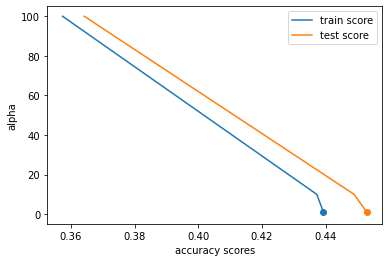

In [41]:
alpha = [0.1,1,10,100]
means = grid9.cv_results_['mean_test_score']
for i in alpha:
    if i==grid9.best_params_['rid__alpha']:
        ind=alpha.index(i)

plt.plot(means,alpha,label="train score")
plt.plot(train,alpha,label="test score")
plt.scatter(means[ind],alpha[ind])
plt.scatter(train[ind],alpha[ind])
plt.xlabel("accuracy scores")
plt.ylabel("alpha")
plt.legend(loc="upper right")
plt.show()

<h3> PCA with Lasso Regression </h3>

In [42]:
clf3 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("las", Lasso())
    ])
parameters2={'las__alpha':[0.1,1,10,100]}
grid10=GridSearchCV(clf3,parameters2,cv=3,return_train_score=True)
grid10.fit(X_train,Y_train)
train=grid10.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid10.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid10.score(X_test,Y_test)))

Best Parameters: {'las__alpha': 100}
Train score: 0.45293533576760786
Test score: 0.47961120989591877


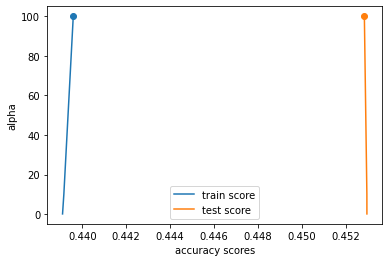

In [43]:
alpha = [0.1,1,10,100]
means = grid10.cv_results_['mean_test_score']
for i in alpha:
    if i==grid10.best_params_['las__alpha']:
        ind=alpha.index(i)

plt.plot(means,alpha,label="train score")
plt.plot(train,alpha,label="test score")
plt.scatter(means[ind],alpha[ind])
plt.scatter(train[ind],alpha[ind])
plt.xlabel("accuracy scores")
plt.ylabel("alpha")
plt.legend(loc="best")
plt.show()

<h3> PCA with Polynomial Regression </h3>

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    PolynomialFeatures(),
    Ridge())
clf4 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("poly", pipe)
    ])
parameters2={'poly__polynomialfeatures__degree':[1,2,3],'poly__ridge__alpha':[0.1,1,10,100]}
grid11=GridSearchCV(clf4,parameters2,cv=3,return_train_score=True)
grid11.fit(X_train,Y_train)
train=grid11.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid11.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid11.score(X_test,Y_test)))

Best Parameters: {'poly__polynomialfeatures__degree': 2, 'poly__ridge__alpha': 0.1}
Train score: 0.48880303409367004
Test score: 0.5345631769573334


<h3> PCA with Linear SVR </h3>

In [45]:
clf5 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lsvr", LinearSVR())
    ])
parameters2={'lsvr__C':[1,10,100]}
grid12=GridSearchCV(clf5,parameters2,cv=3,return_train_score=True)
grid12.fit(X_train,Y_train)
train=grid12.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid12.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid12.score(X_test,Y_test)))

Best Parameters: {'lsvr__C': 100}
Train score: -3.346103335379727
Test score: -0.991896257558669


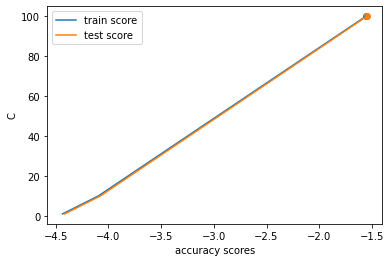

In [46]:
C=[1,10,100]
means = grid12.cv_results_['mean_test_score']
for i in C:
    if i==grid12.best_params_['lsvr__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

<h3> PCA with SVR with linear kernel </h3>

In [47]:
clf6 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lsvrk", SVR(kernel='linear'))
    ])
parameters2={"lsvrk__C":[1,10,100]}
grid13=GridSearchCV(clf6,parameters2,cv=3,return_train_score=True)
grid13.fit(X_train,Y_train)
train=grid13.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid13.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid13.score(X_test,Y_test)))

Best Parameters: {'lsvrk__C': 100}
Train score: -0.002119218205083586
Test score: 0.17142848967891244


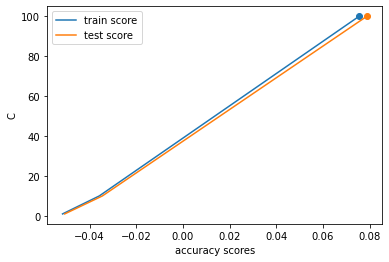

In [48]:
C=[1,10,100]
means = grid13.cv_results_['mean_test_score']
for i in C:
    if i==grid13.best_params_['lsvrk__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

<h3> PCA with SVR with rbf kernel </h3>

In [49]:
clf7 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("rsvrk", SVR(kernel='rbf',C=100,gamma=1))
    ])
parameters2={"rsvrk__C":[1,10,100]}
grid14=GridSearchCV(clf7,parameters2,cv=3,return_train_score=True)
grid14.fit(X_train,Y_train)
train=grid14.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid14.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid14.score(X_test,Y_test)))

Best Parameters: {'rsvrk__C': 100}
Train score: -0.0398004685114283
Test score: 0.035388336351242056


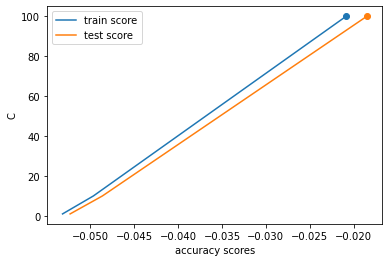

In [50]:
C=[1,10,100]
means = grid14.cv_results_['mean_test_score']
for i in C:
    if i==grid14.best_params_['rsvrk__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

<h3> PCA with SVR with poly kernel </h3>

In [51]:
clf8 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("psvrk", SVR(kernel='poly',C=100,degree=1))
    ])
parameters2={"psvrk__C":[1,10,100],"psvrk__degree":[1,2,3]}
grid15=GridSearchCV(clf8,parameters2,cv=3,return_train_score=True)
grid15.fit(X_train,Y_train)
train=grid15.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid15.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid15.score(X_test,Y_test)))

Best Parameters: {'psvrk__C': 100, 'psvrk__degree': 1}
Train score: -0.03178802902280424
Test score: 0.11069774264206667


<h3>Scores of algorithms without PCA </h3>
<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Train Score</th> 
    <th>Test Score</th>
  </tr>
  <tr>
    <td>K Nearest Neighbors</td>
    <td>0.8181343712446223</td> 
    <td>0.5205609403529093</td>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>0.04153727818031039</td> 
    <td>0.6417044300454586</td>
  </tr>
    <tr>
    <td>Ridge</td>
    <td>0.5341996581775573</td> 
    <td>0.6393481813161475</td>
  </tr>
    <tr>
    <td>Lasso</td>
    <td>0.6500176212701751</td> 
    <td>0.6393673931000765</td>
  </tr>
    <tr>
    <td>Polynomial Regression</td>
    <td>0.7733110614843973</td> 
    <td>0.6394886200845961</td>
  </tr>
    <tr>
    <td>Linear SVR</td>
    <td>-3.4619045155145174</td> 
    <td>-0.04573055192465872</td>
  </tr>
    <tr>
    <td>SVR with linear kernel</td>
    <td>-0.02695011195869257</td> 
    <td>0.07780976167175584</td>
  </tr>
    <tr>
    <td>SVR with RBF kernel</td>
    <td>-0.050443497989496405</td> 
    <td>-0.024432118052453922</td>
  </tr>
    <tr>
    <td>SVR with poly kernel</td>
    <td>-0.05245133029911933</td> 
    <td>-0.04702764160139896</td>
  </tr>
</table>

<h3>Scores of algorithms with PCA </h3>
<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Train Score</th> 
    <th>Test Score</th>
  </tr>
  <tr>
    <td>K Nearest Neighbors</td>
    <td>0.7901379744999255</td> 
    <td>0.5115595216235556</td>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>-1.77331920117229</td> 
    <td>0.4790003887649018</td>
  </tr>
    <tr>
    <td>Ridge</td>
    <td>0.42974185183171765</td> 
    <td>0.4785838288137123</td>
  </tr>
    <tr>
    <td>Lasso</td>
    <td>0.45293533576760786</td> 
    <td>0.47961120989591893</td>
  </tr>
    <tr>
    <td>Polynomial Regression</td>
    <td>0.48880303409367</td> 
    <td>0.5345631769573314</td>
  </tr>
    <tr>
    <td>Linear SVR</td>
    <td>-3.3461885678307914</td> 
    <td>-0.9913613571268671</td>
  </tr>
    <tr>
    <td>SVR with linear kernel</td>
    <td>-0.0021192182050836</td> 
    <td>0.17142848967891244</td>
  </tr>
    <tr>
    <td>SVR with RBF kernel</td>
    <td>-0.0398004685114283</td> 
    <td>0.035388336351242056</td>
  </tr>
    <tr>
    <td>SVR with poly kernel</td>
    <td>-0.04996824692728004</td> 
    <td>0.01129763243823756</td>
  </tr>
</table>

For this dataset and the above computation, the PCA scores show improvement in accuracy scores of the model when executing algorithms with Kernel trick which lacked when running the same algorithms without PCA

<h3> Deep Learning model for Regression </h3>

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [55]:
X_train.shape

(1387, 26)

In [56]:
# Step 1: Build the model
model1 = Sequential()
#Input leyer
model1.add(Dense(126, input_dim = 26, activation = 'relu'))
#Hidden layer
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(25, activation = 'relu'))
#Output layer
model1.add(Dense(1, kernel_initializer='normal'))

# Step 2: Build the computational graph - compile
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])

# Step 3: Train the model
model1.fit(X_train, Y_train, epochs = 30, batch_size = 50)
scores = model1.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

from sklearn.metrics import r2_score, recall_score, precision_score



Epoch 1/30
28/28 [==============================] - 0s 550us/step - loss: 213556.3906 - mean_absolute_error: 213556.3906
Epoch 2/30
28/28 [==============================] - 0s 534us/step - loss: 213550.1250 - mean_absolute_error: 213550.1250
Epoch 3/30
28/28 [==============================] - 0s 534us/step - loss: 213506.8906 - mean_absolute_error: 213506.8906
Epoch 4/30
28/28 [==============================] - 0s 570us/step - loss: 213315.4375 - mean_absolute_error: 213315.4375
Epoch 5/30
28/28 [==============================] - 0s 534us/step - loss: 212715.8750 - mean_absolute_error: 212715.8750
Epoch 6/30
28/28 [==============================] - 0s 605us/step - loss: 211262.2656 - mean_absolute_error: 211262.2656
Epoch 7/30
28/28 [==============================] - 0s 570us/step - loss: 208291.8594 - mean_absolute_error: 208291.8594
Epoch 8/30
28/28 [==============================] - 0s 570us/step - loss: 202960.6562 - mean_absolute_error: 202960.6562
Epoch 9/30
28/28 [==============

In [57]:
Y_train_predict = model1.predict(X_train)
Y_test_predict = model1.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(Y_train, Y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(Y_test, Y_test_predict)))


Train score: 0.37
Test score: 0.45
